<a href="https://colab.research.google.com/github/Nkeeydata/car_Prediction_Challenge/blob/main/D_S_NChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSN HACKANTHON CHALLENGE FOR AI BOOTCAMP 2025

### Used Car Prediction

### INTRODUCTION

Seeing that the prices of new branded cars are on the high side due to changes in my country's economy, I decided to go for fairly used cars. So this project is to build a model that could be used to predict the prices of used cars to enable knowing the features that affects the prices of cars before micro shopping. The datasets was gotten and downloaded from ```kaggle```, and it comprises of the ```train datasets```, the ```test datasets```, and the ```submission datasets``` which will act as our format for the final submission.

### COLUMN DESCRIPTION

```Transmission``` refers to whether your car has a manual or automatic gear.

```Accident``` refers to whether the car has collided with another vehicle or something else. Previous accidents can significantly impact a car's value, even if repairs were done well.

```Brand``` refers to the make of the car. That is, the manufacturer's or company name. Some brands are known for reliability and longevity, which helps them maintain higher resale values. For example, Toyota

```model_year``` refers to the year the car was produced. The price of a car diminishes with time and its usage. Aspects include car models, variants, supply and demand, and price

```Mileage``` is the distance travelled by the car since produced. Usually cars with higher mileage will have a reduced value on the basis that they have been used more and likely to experience wear and.

```Model``` is the name of a car product or a line of cars. Example, camry

```Fuel_type``` is responsible for the fuel rate consumption of the car. it is a type of engine

```engine``` is the machine that powers the car, and it can be grouped according to ```fuel_type```

### IMPORTATION OF LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

# visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import re
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

### Importation of Datasets

In [ ]:
df_trn = pd.read_csv('train12.csv')
df_tc = pd.read_csv('test12.csv')
df_sc = pd.read_csv('sample_submission12.csv')

### Merging both Train and Test dataset for preprocessing and transformation

In [ ]:
df_trn['source'] = 'train'
df_tc['source'] = 'test'

In [ ]:
df = pd.concat([df_trn, df_tc], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314223 entries, 0 to 314222
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            314223 non-null  int64  
 1   brand         314223 non-null  object 
 2   model         314223 non-null  object 
 3   model_year    314223 non-null  int64  
 4   milage        314223 non-null  int64  
 5   fuel_type     305757 non-null  object 
 6   engine        314223 non-null  object 
 7   transmission  314223 non-null  object 
 8   ext_col       314223 non-null  object 
 9   int_col       314223 non-null  object 
 10  accident      310139 non-null  object 
 11  clean_title   278565 non-null  object 
 12  price         188533 non-null  float64
 13  source        314223 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 33.6+ MB


In [ ]:
df.isnull().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type         8466
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
source               0
dtype: int64

#### So we will be cleaning ```fuel_type```, ```accident```, and ```clean_title```. The price there came from the test file which doesn't have that column

In [ ]:
df['fuel_type'].value_counts() # checking unique values in the column

fuel_type
Gasoline          276473
Hybrid             11508
E85 Flex Fuel       8929
Diesel              6641
–                   1319
Plug-In Hybrid       858
not supported         29
Name: count, dtype: int64

In [ ]:
# Seeing that we have - in the dataset, we have to perform the below
# Replace '-' with NaN
df['fuel_type'] = df['fuel_type'].replace('–', np.nan)

# Fill NaN (including '-') with mode
mode_value = df['fuel_type'].mode()[0]
df['fuel_type'] = df['fuel_type'].fillna(mode_value)

In [ ]:
df['accident'].value_counts()

accident
None reported                             240777
At least 1 accident or damage reported     69362
Name: count, dtype: int64

In [ ]:
df.fillna({'accident':'None reported'}, inplace=True)

In [ ]:
df['accident'].value_counts()

accident
None reported                             244861
At least 1 accident or damage reported     69362
Name: count, dtype: int64

In [ ]:
df.fillna({'clean_title':'Unknown'}, inplace=True)

In [ ]:
df['clean_title'].value_counts()

clean_title
Yes        278565
Unknown     35658
Name: count, dtype: int64

In [ ]:
df.isnull().sum() # cleaned dataset

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type            0
engine               0
transmission         0
ext_col              0
int_col              0
accident             0
clean_title          0
price           125690
source               0
dtype: int64

### Data Visualization

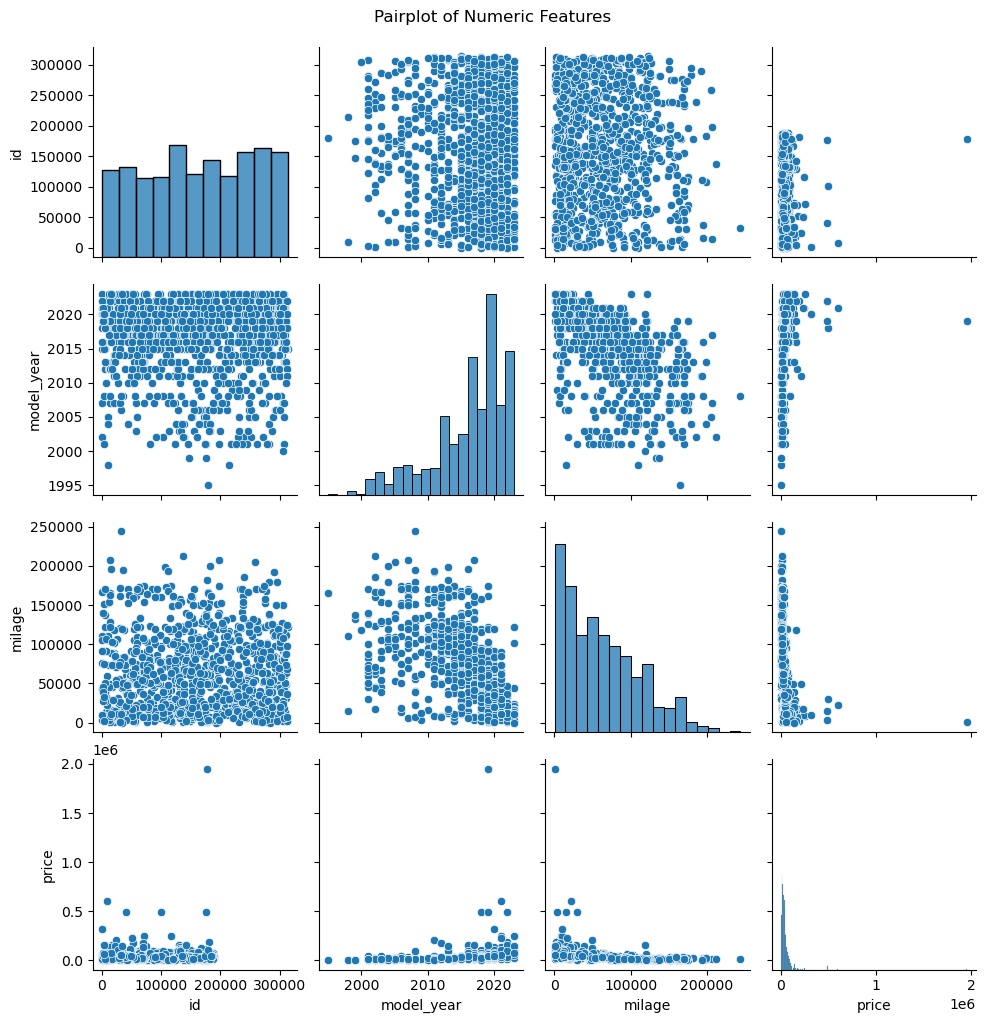

In [ ]:
# Select only numeric columns for pairplot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot (sample 1000 rows for speed if dataset is large)
sns.pairplot(df[numeric_cols].sample(1000, random_state=42))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

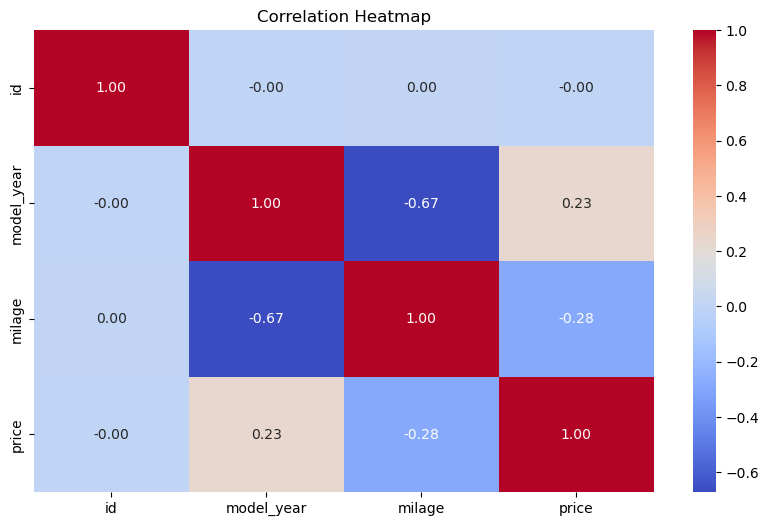

In [ ]:
# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

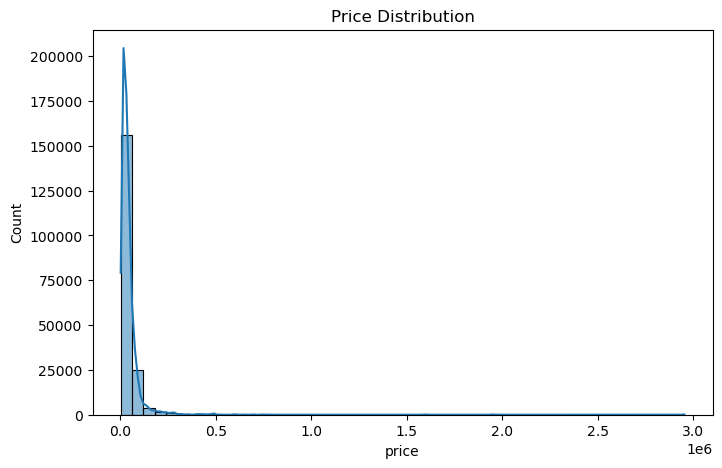

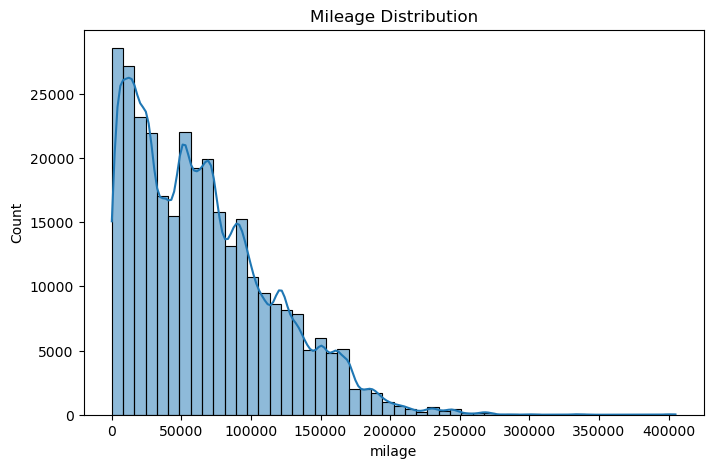

In [ ]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Mileage distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['milage'], bins=50, kde=True)
plt.title("Mileage Distribution")
plt.show()

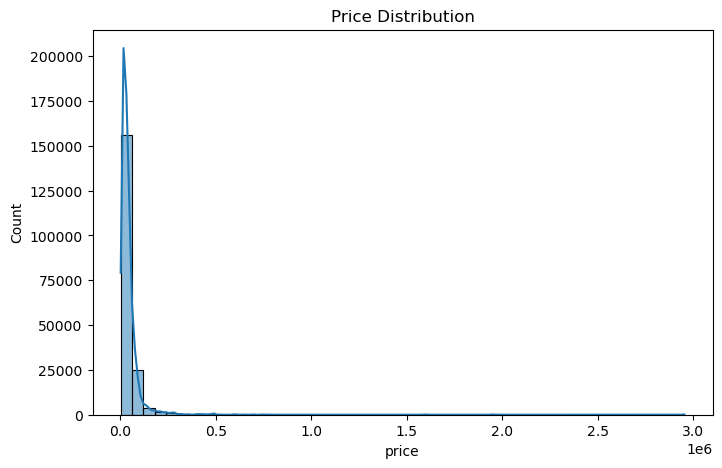

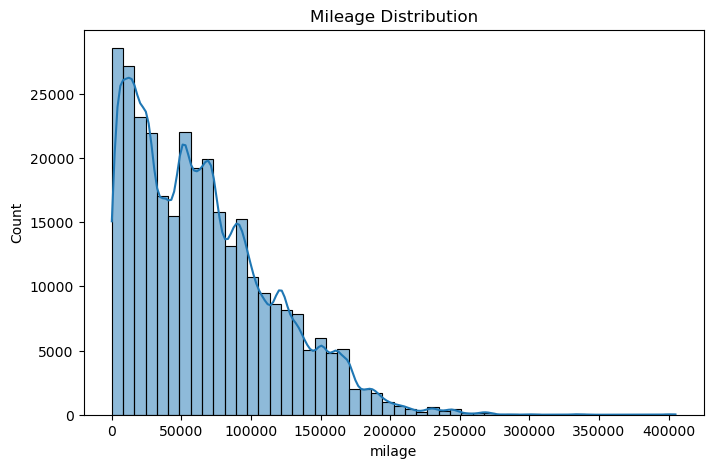

In [ ]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Mileage distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['milage'], bins=50, kde=True)
plt.title("Mileage Distribution")
plt.show()

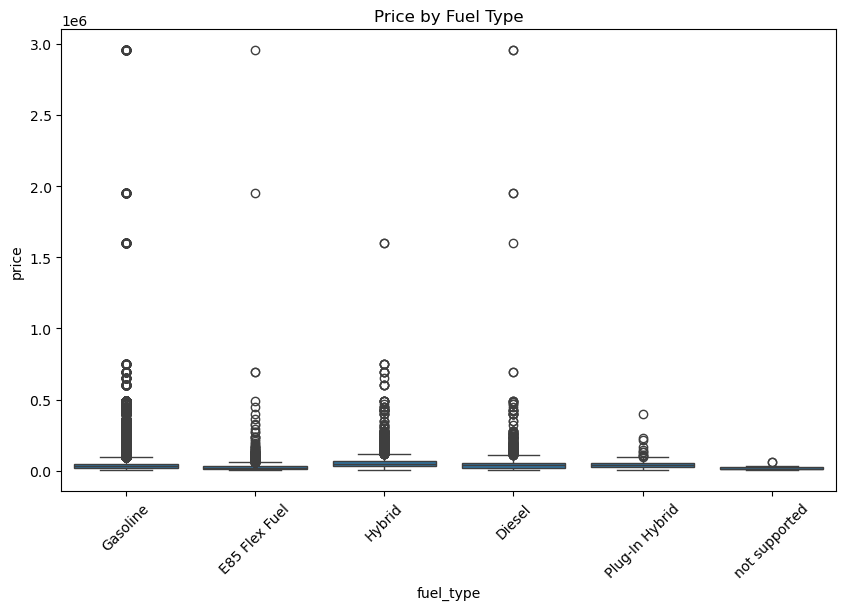

In [ ]:
# Example: Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Fuel Type")
plt.show()

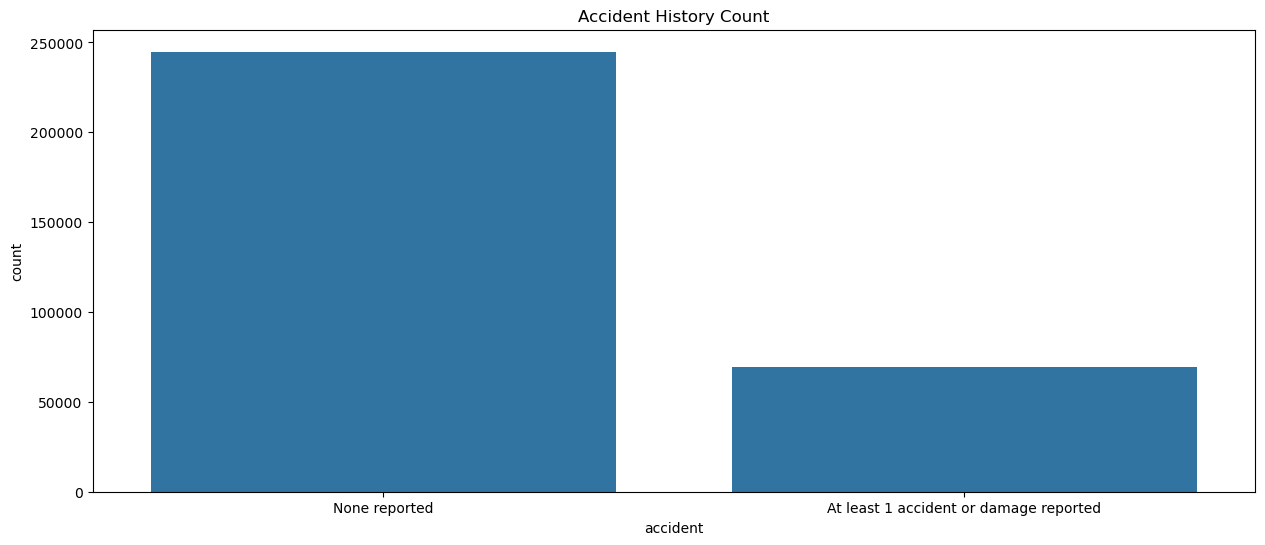

In [ ]:
# Example: Accident history
plt.figure(figsize=(15, 6))
sns.countplot(x='accident', data=df)
plt.title("Accident History Count")
plt.show()

### Data Transformation

In [ ]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'source'],
      dtype='object')

#### Transformation on ```Milage``` Feature

In [ ]:
# performing logarithm on my milage before passing it into model

df['log_milage'] = np.log1p(df['milage'])

#### Transformation on ```Brand``` Feature

In [ ]:
# assigning the unique count of brand to brand_counts
brand_counts = df['brand'].value_counts()

# Identify brands with fewer than 1000 listings
rare_brands = brand_counts[brand_counts < 800].index

# Create a new column with rare brands grouped as "Other"
df['brand_grouped'] = df['brand'].apply(lambda x: 'Other' if x in rare_brands else x)

In [ ]:
# Target Encoding with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
df['brand_encoded'] = np.nan  # placeholder for encoded values

for train_idx, val_idx in kf.split(df):
    train_data = df.iloc[train_idx]
    val_data = df.iloc[val_idx]

    # Compute mean price per brand in training fold
    brand_means = train_data.groupby('brand_grouped')['price'].mean()

# Map means to validation fold
    df.loc[val_idx, 'brand_encoded'] = val_data['brand_grouped'].map(brand_means)

# Fill any remaining NaNs with the global mean price
global_mean = df['price'].mean()
df.fillna({'brand_encoded':global_mean}, inplace=True)

### Transformation on the ```model``` Feature

In [ ]:
model_counts = df['model'].value_counts()
rare_models = model_counts[model_counts < 150].index
df['model_grouped'] = df['model'].apply(lambda x: 'Other' if x in rare_models else x)

In [ ]:
# Target encoding with cross-validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)
df['model_encoded'] = np.nan

for train_idx, val_idx in kf.split(df):
    train_data = df.iloc[train_idx]
    val_data = df.iloc[val_idx]
    model_means = train_data.groupby('model_grouped')['price'].mean()
    df.loc[val_idx, 'model_encoded'] = val_data['model_grouped'].map(model_means)

global_mean = df['price'].mean()
df.fillna({'model_encoded':global_mean}, inplace = True)

In [ ]:
df_c = df.copy() #duplicating the dataset

#### Transformation on ```fuel_type``` Feature

In [ ]:
# One-hot encode fuel_type for linear regression
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)

#### Transformation on the ```engine``` Feature

In [ ]:
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)HP')[0].astype(float)
df['engine_liters'] = df['engine'].str.extract(r'(\d+\.?\d*)L')[0].astype(float)
df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*Cyl')[0].astype(float)

df['is_turbo'] = df['engine'].str.contains('Turbo', case=False, na=False).astype(int)
df['is_supercharged'] = df['engine'].str.contains('Supercharged', case=False, na=False).astype(int)
df['is_hybrid_engine'] = df['engine'].str.contains('Hybrid', case=False, na=False).astype(int)

#### Transformation on the ```transmission``` Feature

In [ ]:
# Extracting transmission type

def simplify_transmission(val):
    val = str(val).lower()
    if 'manual' in val or 'm/t' in val:
        return 'Manual'
    elif 'cvt' in val:
        return 'CVT'
    elif 'dct' in val:
        return 'DCT'
    else:
        return 'Automatic'

df['trans_type'] = df['transmission'].apply(simplify_transmission)

In [ ]:
# Extracting number of gears

df['trans_gears'] = df['transmission'].str.extract(r'(\d+)-?speed', flags=re.IGNORECASE)[0].astype(float)

In [ ]:
# Creating binary flags for special features

df['has_autoshift'] = df['transmission'].str.contains('Auto-Shift', case=False, na=False).astype(int)
df['has_overdrive'] = df['transmission'].str.contains('Overdrive', case=False, na=False).astype(int)

In [ ]:
# One-hot encode trans_type for Linear Regression ---

df = pd.get_dummies(df, columns=['trans_type'], drop_first=True)

#### Transformation on the ```accident``` Feature

In [ ]:
# Converting the accident column into numeric feature

df['accident_flag'] = df['accident'].map({
    'None reported': 0,
    'At least 1 accident or damage reported': 1
})

#### Transformation on the ```clean_title``` Feature

In [ ]:
# Converting to binary flag since its just two unique values

df['clean_title_flag'] = df['clean_title'].map({
    'Yes': 1,
    'Unknown': 0
})

### Transformation on the ```ext_col``` and ```int_col```.

#### looking at the graph below, you will agree with me that both the exterior and interior color can be dropped as the features are too much and not positively correlated that much. Also, the color is important for some customers, but its not the main focus before used car acquisition. Due to the above, I will be dropping the both columns from our dataset to enable the model focus on more important features.

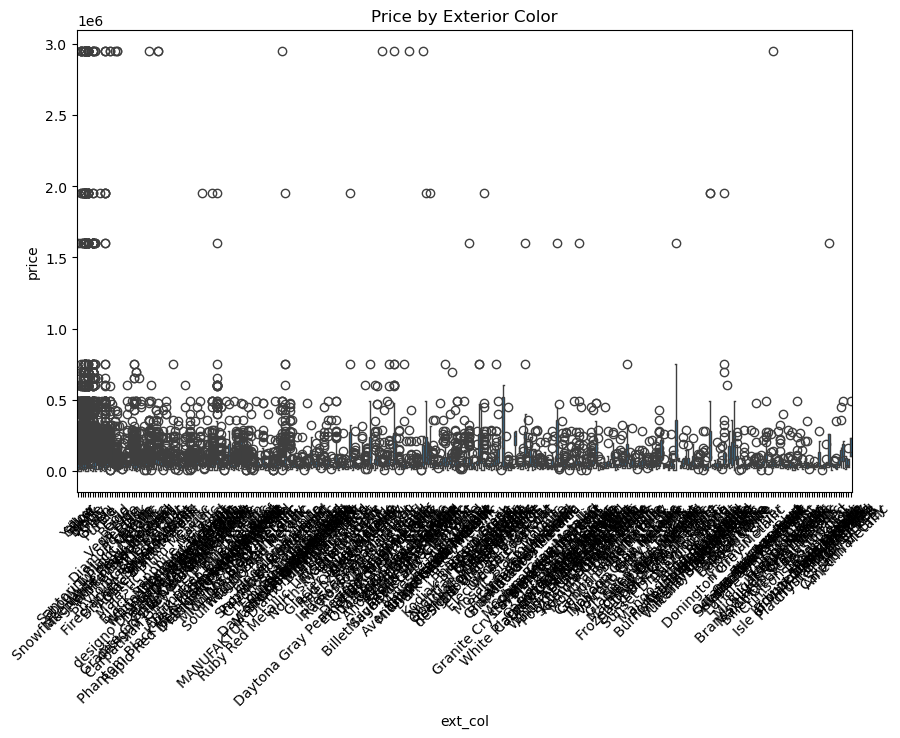

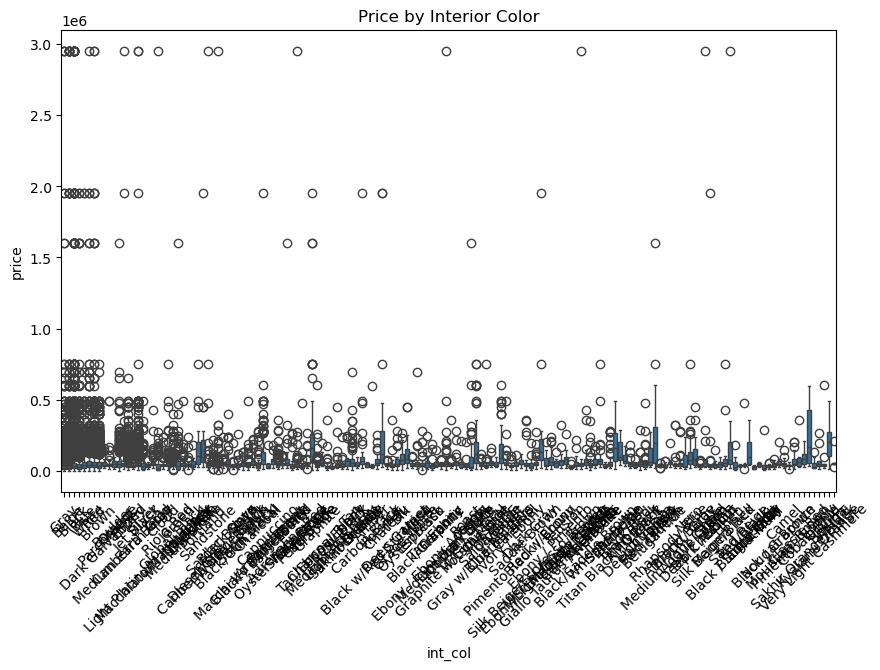

In [ ]:
# Example: Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='ext_col', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Exterior Color")
plt.show()

# Example: Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='int_col', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Interior Color")
plt.show()

### Dropping Uncorrelated Features from the DataFrame before Unmerging

In [ ]:
df.shape # confirming the row and column number

(314223, 37)

In [ ]:
df.drop(columns=['id', 'brand', 'model', 'brand_grouped', 'model_grouped', 'fuel_type', 'engine', 'transmission', 'accident', 'clean_title', 'ext_col', 'int_col', 'milage'], errors='ignore', inplace=True)


In [ ]:
df.shape # new shape of our DataFrame

(314223, 25)

### Unmerging DataFrame

In [ ]:
df_n = df.copy() # duplicating our DataFrame incase of any unforseen incident

In [ ]:
df_r = df[df['source'] == 'train'].drop(columns='source')
df_t = df[df['source'] == 'test'].drop(columns=['source', 'price'])

In [ ]:
df_r.shape # new training dataset

(188533, 24)

In [ ]:
df_t.shape # new test dataset

(125690, 23)

#### Transformation on the ```price``` Feature

In [ ]:
# Then apply log transformation

df_r['log_price'] = np.log1p(df_r['price'])

### Splitting into X and y variable for training purposes

In [ ]:
# Drop target columns from training features
X = df_r.drop(columns=['price', 'log_price'])
y = df_r['log_price']


In [ ]:
# Using train_test_split to split the variables
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Training our Model

In [ ]:
print(X_train.isnull().sum())

model_year                      0
price                           0
log_milage                      0
brand_encoded                   0
model_encoded                   0
fuel_type_E85 Flex Fuel         0
fuel_type_Gasoline              0
fuel_type_Hybrid                0
fuel_type_Plug-In Hybrid        0
fuel_type_not supported         0
horsepower                  26575
engine_liters               11343
cylinders                   30250
is_turbo                        0
is_supercharged                 0
is_hybrid_engine                0
trans_gears                 67465
has_autoshift                   0
has_overdrive                   0
trans_type_CVT                  0
trans_type_DCT                  0
trans_type_Manual               0
accident_flag                   0
clean_title_flag                0
log_price                       0
dtype: int64


### Using SimpleImputer to remove null values

In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test_final)


### Using HistGradientBoostingRegressor that handles nan values well

In [ ]:
# Initialize the model
hgb_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42)

# Fit the model
hgb_model.fit(X_train, y_train)

# Predict
y_pred = hgb_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 0.49579996227437984


C:\Users\Nkechi Pc\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
log_rmse = 0.03826166342319421
actual_rmse = np.expm1(log_rmse)
print("Actual RMSE in price:", actual_rmse)


Actual RMSE in price: 0.039003066411566874


### Performing Hyperparameter to get an improved RMSE

In [ ]:
# Define the model
hgb = HistGradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200],
    'max_leaf_nodes': [20, 31, 50],
    'max_depth': [None, 5, 10],
    'l2_regularization': [0.0, 0.1, 1.0]
}



In [ ]:
# Set up GridSearchCV

grid_search = GridSearchCV(
    estimator=hgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

In [ ]:
# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model and score
print("Best RMSE:", -grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best RMSE: 0.49194696612525535
Best Parameters: {'l2_regularization': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 50}


In [ ]:
X_test_final = df_t[X_train.columns]


In [ ]:
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(df_t)

In [ ]:
y_pred_actual = np.expm1(y_pred_log)

In [ ]:
y_pred_actual = np.expm1(y_pred)

y_test_actual = np.expm1(y_test)

actual_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))


In [ ]:
# Ensure test set has same columns as training set
X_test_final = df_t[X_train.columns]

# Predict using the pipeline (this applies imputer + regressor)
y_pred_log = pipeline.predict(X_test_final)

# Convert log_price back to actual price
y_pred_actual = np.expm1(y_pred_log)



In [ ]:
df_sc['price'] = y_pred_actual

In [ ]:
df_sc.to_csv('updated1_submission.csv', index=False)
df_sc

,id,price
0,188533,20514.604282
1,188534,63563.790675
2,188535,51385.656360
3,188536,27854.523555
4,188537,25407.765481
...,...,...
125685,314218,23560.382626
125686,314219,40347.123544
125687,314220,19423.606095
125688,314221,18809.472434


### To Visualize the predicted Price

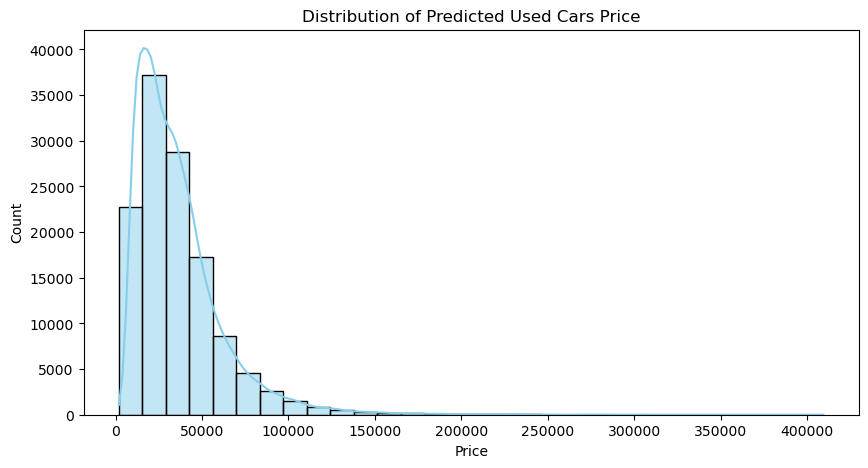

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_sc['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Predicted Used Cars Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#### From above, we see that most bought cars fall under ```500000``` in amount as less clients goes for luxury used cars.

### Visualizing Feature Importance from the model

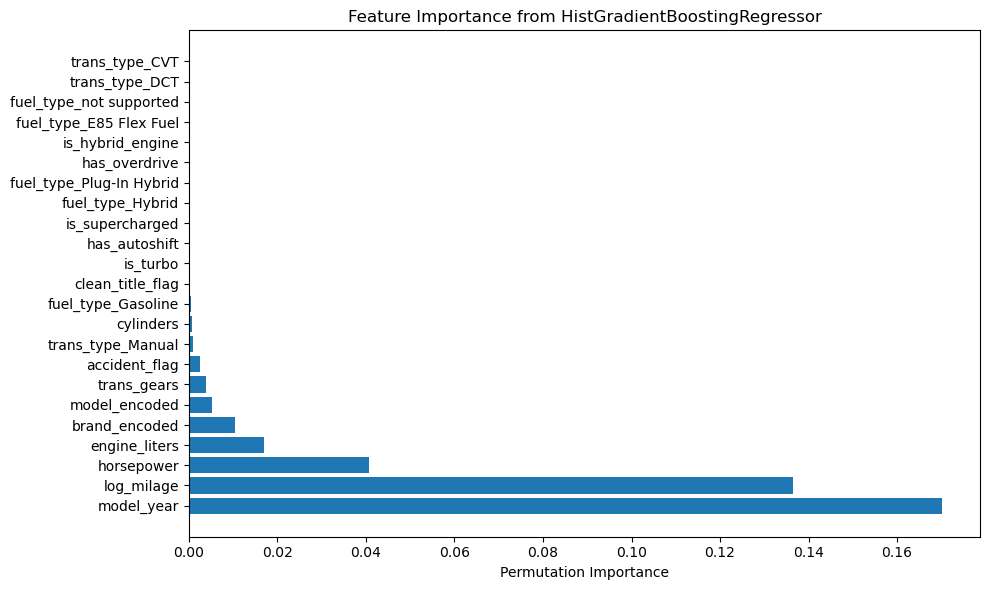

In [ ]:
# Run permutation importance
result = permutation_importance(
    best_model,       # your trained HistGradientBoostingRegressor
    X_test,           # test features
    y_test,           # true target values
    n_repeats=10,
    random_state=42,
    scoring='neg_root_mean_squared_error'
)

# Sort and plot
sorted_idx = result.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance from HistGradientBoostingRegressor")
plt.tight_layout()
plt.show()

Above shows that ```model_year``` is the most important feature when it comes to customers choice in purchasing used cars.

### Thank you!